MODELO DE PRONOSTICO PARA LA REGIÓN CARIBE

Importar librerias requeridas

In [2]:
import numpy as np
import pandas as pd
import statsmodels as sm
import matplotlib.pyplot as plt

Cargar los datos desde el archivo CSV

In [3]:
df_RC = pd.read_csv("MEN_RC_ModeloP.csv", encoding="latin-1", sep=";", index_col= 'AÑO')

Ver las primeras filas del DataFrame

In [4]:
df_RC[['COBERTURA_NETA', 'DESERCIÓN', 'APROBACIÓN' , 'REPROBACIÓN' , 'REPITENCIA']].describe()

,COBERTURA_NETA,DESERCIÓN,APROBACIÓN,REPROBACIÓN,REPITENCIA
count,2548.000000,2547.000000,2555.000000,2543.000000,2548.000000
mean,89.615793,3.390145,92.124477,4.408089,3.544486
std,15.188484,2.194189,4.867162,4.001201,3.426238
min,33.080000,0.110000,50.140000,0.000000,0.000000
25%,81.700000,1.820000,88.765000,0.630000,0.970000
50%,89.700000,2.950000,92.570000,3.920000,2.440000
75%,97.752500,4.485000,96.110000,7.140000,5.102500
max,264.540000,13.260000,100.000000,49.390000,37.470000


In [5]:
df_RC.head()

,CÓDIGO_MUNICIPIO,MUNICIPIO,CÓDIGO_DEPARTAMENTO,DEPARTAMENTO,CÓDIGO_ETC,ETC,POBLACIÓN_5_16,COBERTURA_NETA,DESERCIÓN,APROBACIÓN,REPROBACIÓN,REPITENCIA
AÑO,,,,,,,,,,,,
2011,8001,Barranquilla,8,Atlántico,4909.0,Barranquilla,250498.0,115.0,2.81,97.19,0.00,2.02
2011,8078,Baranoa,8,Atlántico,3764.0,Atlántico (ETC),12359.0,95.8,1.00,96.68,2.32,2.63
2011,8137,Campo de la Cruz,8,Atlántico,3764.0,Atlántico (ETC),4913.0,91.1,1.25,98.67,0.08,0.06
2011,8141,Candelaria,8,Atlántico,3764.0,Atlántico (ETC),3335.0,82.3,2.38,97.40,0.21,0.15
2011,8296,Galapa,8,Atlántico,3764.0,Atlántico (ETC),9624.0,77.9,0.76,93.85,5.40,2.08


In [6]:
df_RC[['COBERTURA_NETA', 'DESERCIÓN', 'APROBACIÓN' , 'REPROBACIÓN' , 'REPITENCIA']].describe()

,COBERTURA_NETA,DESERCIÓN,APROBACIÓN,REPROBACIÓN,REPITENCIA
count,2548.000000,2547.000000,2555.000000,2543.000000,2548.000000
mean,89.615793,3.390145,92.124477,4.408089,3.544486
std,15.188484,2.194189,4.867162,4.001201,3.426238
min,33.080000,0.110000,50.140000,0.000000,0.000000
25%,81.700000,1.820000,88.765000,0.630000,0.970000
50%,89.700000,2.950000,92.570000,3.920000,2.440000
75%,97.752500,4.485000,96.110000,7.140000,5.102500
max,264.540000,13.260000,100.000000,49.390000,37.470000


In [7]:
#Tabla promedio de todos los municipios
PT = pd.pivot_table(df_RC,values=['COBERTURA_NETA', 'DESERCIÓN', 'APROBACIÓN' , 'REPROBACIÓN' , 'REPITENCIA'],index='AÑO',aggfunc='mean')
PT

,APROBACIÓN,COBERTURA_NETA,DESERCIÓN,REPITENCIA,REPROBACIÓN
AÑO,,,,,
2011,93.149948,91.632642,4.626984,1.525876,1.953523
2012,93.069175,89.460417,4.087656,1.539326,2.483526
2013,94.390203,90.637436,2.999643,1.806244,2.494615
2014,94.412538,85.263807,3.693553,1.848497,1.826582
2015,93.383350,88.470513,2.648629,2.308872,3.706114
2016,92.822792,91.434822,3.333706,2.913655,3.843299
2017,92.420305,92.125736,2.775482,2.370152,4.804365
2018,92.357056,90.519695,2.801624,2.045025,4.841371
2019,92.085838,90.344213,3.010457,2.074518,4.903452


<Axes: xlabel='AÑO', ylabel='Tasa promedio (%)'>

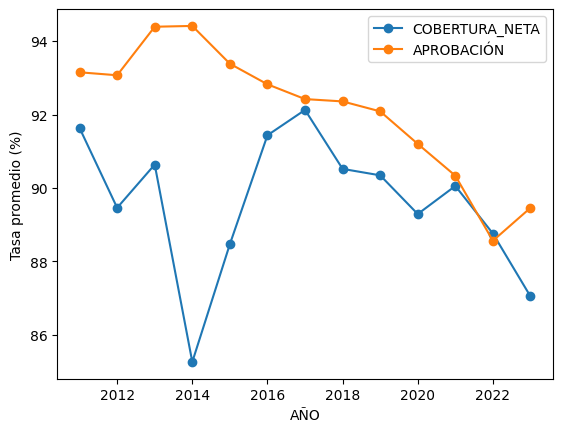

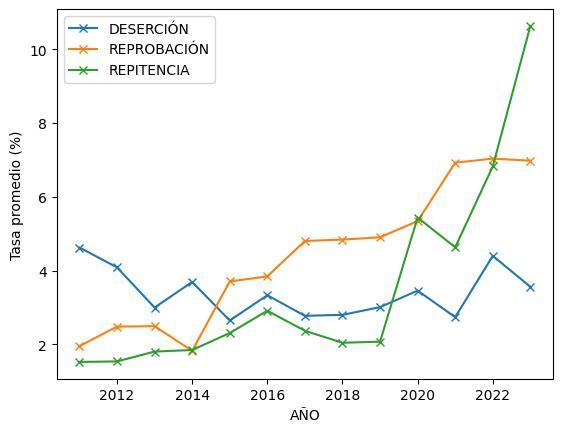

In [8]:
#Gráficas de variables promedio por año
PT[['COBERTURA_NETA','APROBACIÓN']].plot(marker='o', linestyle='-', ylabel='Tasa promedio (%)')
PT[['DESERCIÓN', 'REPROBACIÓN' , 'REPITENCIA']].plot(marker='x', linestyle='-', ylabel='Tasa promedio (%)')

MODELO S-ARIMA

MODELO 1: COBERTURA NETA

Fechas train : 2011 --- 2022  (n=12)
Fechas test  : 2022 --- 2023  (n=2)


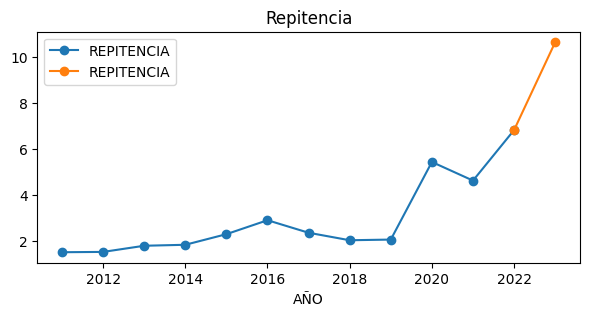

In [9]:
# statsmodels
import statsmodels
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose


# Separación vectores entrenamiento y de prueba
#set_dark_theme()
datos = PT[['REPITENCIA']]
fin_train = '2022'
print(
    f"Fechas train : {datos.index.min()} --- {datos.loc[:fin_train].index.max()}  "
    f"(n={len(datos.loc[:fin_train])})"
)
print(
    f"Fechas test  : {datos.loc[fin_train:].index.min()} --- {datos.loc[:].index.max()}  "
    f"(n={len(datos.loc[fin_train:])})"
)
datos_train = datos.loc[:fin_train]
datos_test  = datos.loc[fin_train:]

# Gráfico
# ======================================================================================
fig, ax=plt.subplots(figsize=(7, 3))
datos_train.plot(ax=ax, label='train',marker='o', linestyle='-')
datos_test.plot(ax=ax, label='test',marker='o', linestyle='-')
ax.set_title('Repitencia')
ax.legend();

Test estacionariedad serie original
-------------------------------------
ADF Statistic: 1.6824547745642258, p-value: 0.9980850205790068
KPSS Statistic: 0.5782852767464273, p-value: 0.024610429386688427

Test estacionariedad para serie diferenciada (order=1)
--------------------------------------------------
ADF Statistic: -4.284362155347639, p-value: 0.00047274109632622515
KPSS Statistic: 0.39951705126929166, p-value: 0.07736333997013291

Test estacionariedad para serie diferenciada (order=2)
--------------------------------------------------
ADF Statistic: -4.530080796514408, p-value: 0.00017344140453775316
KPSS Statistic: 0.5000000000000004, p-value: 0.04166666666666657


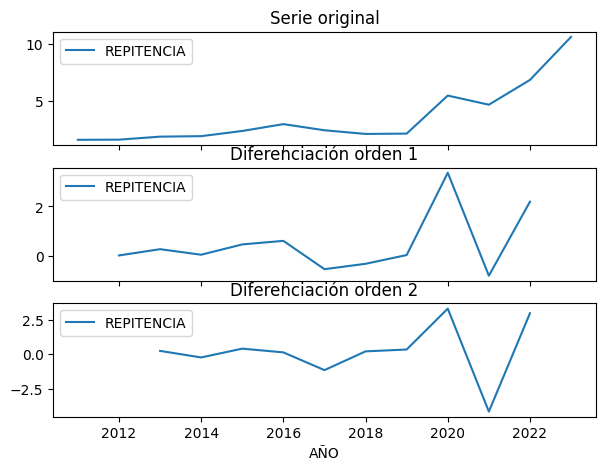

In [10]:
# Test estacionariedad
# ==============================================================================
#warnings.filterwarnings("ignore")

datos_diff_1 = datos_train.diff().dropna()
datos_diff_2 = datos_diff_1.diff().dropna()

print('Test estacionariedad serie original')
print('-------------------------------------')
adfuller_result = adfuller(datos)
kpss_result = kpss(datos)
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest estacionariedad para serie diferenciada (order=1)')
print('--------------------------------------------------')
adfuller_result = adfuller(datos_diff_1)
kpss_result = kpss(datos.diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest estacionariedad para serie diferenciada (order=2)')
print('--------------------------------------------------')
adfuller_result = adfuller(datos_diff_2)
kpss_result = kpss(datos.diff().diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

#warnings.filterwarnings("default")

# Gráfico series
# ==============================================================================
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(7, 5), sharex=True)
datos.plot(ax=axs[0], title='Serie original')
datos_diff_1.plot(ax=axs[1], title='Diferenciación orden 1')
datos_diff_2.plot(ax=axs[2], title='Diferenciación orden 2');

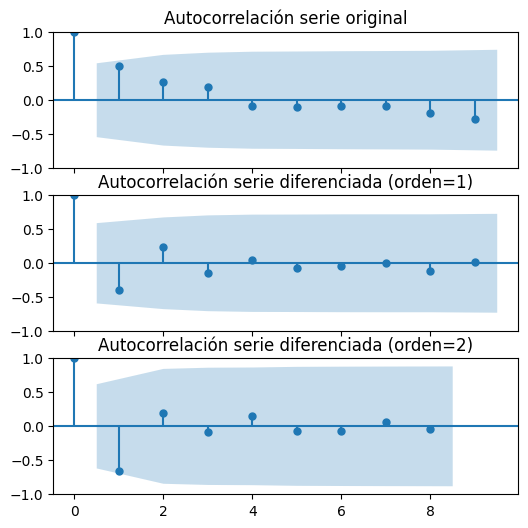

In [11]:
#Análisis resultado para cobertura neta: El p-value obtenido tras la segunda diferenciación es estadísticamente significativo acorde al umbral ampliamente reconocido y aceptado de 0.05.
#  Por lo tanto, la selección más adecuada para el parámetro ARIMA d es 2.

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#plot_acf(datos_diff_1, lags=9, alpha=0.05)



fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(6, 6), sharex=True)
plot_acf(datos, ax=axs[0], lags=9, alpha=0.05)
axs[0].set_title('Autocorrelación serie original')
plot_acf(datos_diff_1, ax=axs[1], lags=9, alpha=0.05)
axs[1].set_title('Autocorrelación serie diferenciada (orden=1)')
plot_acf(datos_diff_2, ax=axs[2], lags=8, alpha=0.05)
axs[2].set_title('Autocorrelación serie diferenciada (orden=2)');

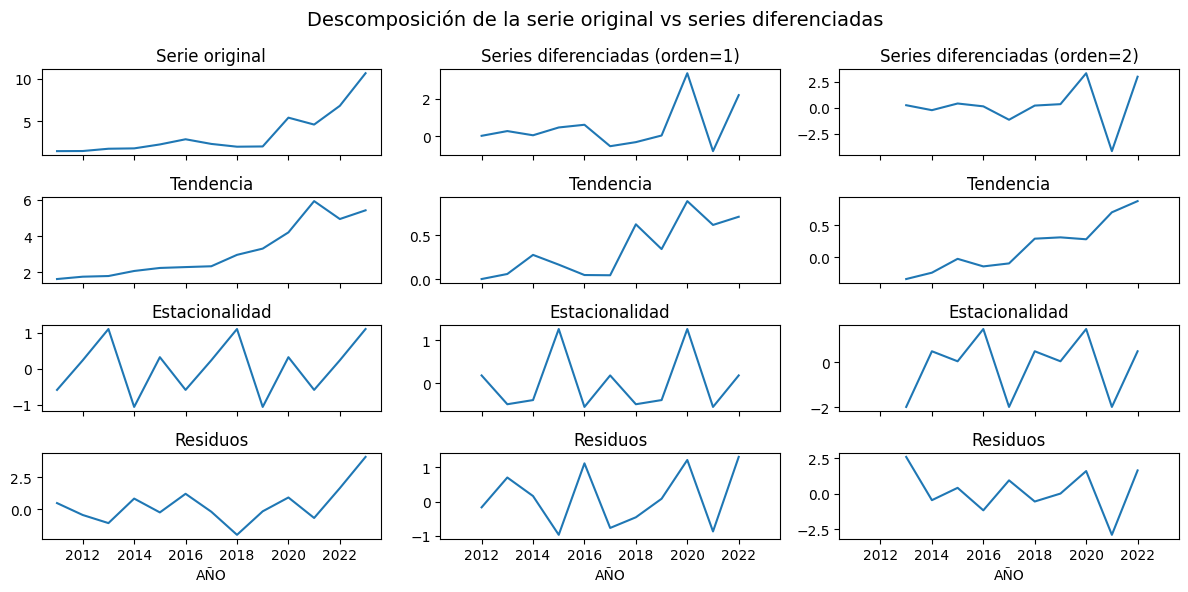

In [12]:
#res_decompose = seasonal_decompose(datos_diff_1, model='additive', extrapolate_trend='freq')
#result = seasonal_decompose(datos, model='additive', period=4)
#result
res_decompose = seasonal_decompose(datos, model='additive', period=5, extrapolate_trend='freq')
res_descompose_diff_2 = seasonal_decompose(datos_diff_1, model='additive', period=5, extrapolate_trend='freq')
res_descompose_diff_3 = seasonal_decompose(datos_diff_2, model='additive', period=4, extrapolate_trend='freq')

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(12, 6), sharex=True)
res_decompose.observed.plot(ax=axs[0, 0])
axs[0, 0].set_title('Serie original', fontsize=12)
res_decompose.trend.plot(ax=axs[1, 0])
axs[1, 0].set_title('Tendencia', fontsize=12)
res_decompose.seasonal.plot(ax=axs[2, 0])
axs[2, 0].set_title('Estacionalidad', fontsize=12)
res_decompose.resid.plot(ax=axs[3, 0])
axs[3, 0].set_title('Residuos', fontsize=12)
res_descompose_diff_2.observed.plot(ax=axs[0, 1])
axs[0, 1].set_title('Series diferenciadas (orden=1)', fontsize=12)
res_descompose_diff_2.trend.plot(ax=axs[1, 1])
axs[1, 1].set_title('Tendencia', fontsize=12)
res_descompose_diff_2.seasonal.plot(ax=axs[2, 1])
axs[2, 1].set_title('Estacionalidad', fontsize=12)
res_descompose_diff_2.resid.plot(ax=axs[3, 1])
axs[3, 1].set_title('Residuos', fontsize=12)

res_descompose_diff_3.observed.plot(ax=axs[0, 2])
axs[0, 2].set_title('Series diferenciadas (orden=2)', fontsize=12)
res_descompose_diff_3.trend.plot(ax=axs[1, 2])
axs[1, 2].set_title('Tendencia', fontsize=12)
res_descompose_diff_3.seasonal.plot(ax=axs[2, 2])
axs[2, 2].set_title('Estacionalidad', fontsize=12)
res_descompose_diff_3.resid.plot(ax=axs[3, 2])
axs[3, 2].set_title('Residuos', fontsize=12)


fig.suptitle('Descomposición de la serie original vs series diferenciadas', fontsize=14)
fig.tight_layout();

In [13]:
#Conclusiones modelo cobertura: Una segunda diferenciación puede introducir ruido innecesario y hacer que el modelo ARIMA sea menos preciso o más difícil de interpretar.
# un modelo SARIMA (con componentes estacionales P, D, Q) es probablemente el más apropiado para capturar la naturaleza de esta serie temporal.

# Modelo SARIMAX con statsmodels.Sarimax
# ==============================================================================
#warnings.filterwarnings("ignore", category=UserWarning, message='Non-invertible|Non-stationary')
modelo = SARIMAX(endog = datos_train, order = (1, 1, 1), seasonal_order = (1, 1, 1, 3))
modelo_res = modelo.fit(disp=0)
#warnings.filterwarnings("default")
modelo_res.summary()

C:\Users\estef\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\estef\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\estef\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\estef\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-in

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                        REPITENCIA   No. Observations:                   12
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 3)   Log Likelihood                 -14.581
Date:                           Thu, 12 Jun 2025   AIC                             39.162
Time:                                   21:48:16   BIC                             39.559
Sample:                                        0   HQIC                            36.483
                                            - 12                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7225     15.066     -0.048      0.962     -30.251      28.806
ma.L1          0.4560     20.481      0.022      0.982     -39.686      40.598
ar.S.L3        0.0513     21.928      0.002      0.998     -42.926      43.029
ma.S.L3       -0.9866    762.196     -0.001      0.999   -1494.863    1492.890
sigma2         1.3519   1007.145      0.001      0.999   -1972.616    1975.320
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.60   Prob(JB):                         0.24
Heteroskedasticity (H):              25.45   Skew:                             1.39
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
# Predicción
# ==============================================================================
#predicciones_statsmodels = modelo_res.get_forecast(steps=len(datos_test)).predicted_mean
#Predecir los próximos 5 años
predicciones_statsmodels = modelo_res.get_forecast(steps=4).predicted_mean
predicciones_statsmodels.name = 'predicciones_statsmodels'

#Adicionar indicadores de año para las predicciones y presentarlas
predicciones_statsmodels.index = [2022, 2023, 2024, 2025]
predicciones_statsmodels.index.name = 'AÑO'
display(predicciones_statsmodels.head(4))

C:\Users\estef\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\estef\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


AÑO
2022    7.115993
2023    7.463867
2024    7.924994
2025    8.957114
Name: predicciones_statsmodels, dtype: float64

In [18]:
datos_train

,REPITENCIA
AÑO,
2011,1.525876
2012,1.539326
2013,1.806244
2014,1.848497
2015,2.308872
2016,2.913655
2017,2.370152
2018,2.045025
2019,2.074518


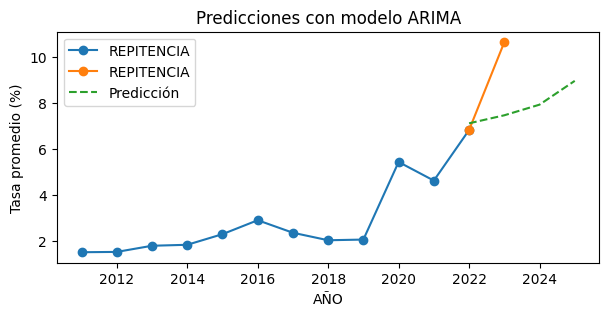

In [16]:
# Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(7, 3))
datos_train.plot(ax=ax, label='Entrenamiento',marker='o', linestyle='-')
datos_test.plot(ax=ax, label='Prueba',marker='o', linestyle='-',ylabel='Tasa promedio (%)' )
predicciones_statsmodels.plot(ax=ax, label='Predicción', linestyle='--')
ax.set_title('Predicciones con modelo ARIMA')
ax.legend();